# NUTS (Nomenclature of territorial units for statistics)

<https://ec.europa.eu/eurostat/web/gisco/geodata/reference-data/administrative-units-statistical-units/nuts>

In [1]:
# import libraries
import os
from datetime import datetime, timezone
from zipfile import BadZipFile, ZipFile
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import ticker
import climag.plot_configs as cplt
from climag.download_data import download_data

In [2]:
print("Last updated:", datetime.now(tz=timezone.utc))

Last updated: 2022-10-19 11:33:52.139095+00:00


In [3]:
# base data download directory
DATA_DIR = os.path.join("data", "boundary")

In [4]:
# file name for the GeoPackage where the boundary vector layers will be saved
GPKG_BOUNDARY = os.path.join(DATA_DIR, "boundaries.gpkg")

In [5]:
# sub directory for the downloaded data
SUB_DIR = os.path.join(DATA_DIR, "nuts-2021", "raw")

In [6]:
# download data if necessary
URL = (
    "https://gisco-services.ec.europa.eu/distribution/v2/nuts/download/"
    "ref-nuts-2021-01m.shp.zip"
)

download_data(server=URL, dl_dir=SUB_DIR)

Data successfully downloaded to data/boundary/nuts-2021/raw 
Last downloaded: 2022-09-21 11:56:47.278603+00:00


In [6]:
os.listdir(SUB_DIR)

['ref-nuts-2021-01m.shp.zip']

In [6]:
DATA_FILE = os.path.join(SUB_DIR, "ref-nuts-2021-01m.shp.zip")

In [8]:
ZipFile(DATA_FILE).namelist()

['NUTS_RG_01M_2021_3035.shp.zip',
 'NUTS_RG_01M_2021_3035_LEVL_0.shp.zip',
 'NUTS_RG_01M_2021_3035_LEVL_1.shp.zip',
 'NUTS_RG_01M_2021_3035_LEVL_2.shp.zip',
 'NUTS_RG_01M_2021_3035_LEVL_3.shp.zip',
 'NUTS_RG_01M_2021_3857.shp.zip',
 'NUTS_RG_01M_2021_3857_LEVL_0.shp.zip',
 'NUTS_RG_01M_2021_3857_LEVL_1.shp.zip',
 'NUTS_RG_01M_2021_3857_LEVL_2.shp.zip',
 'NUTS_RG_01M_2021_3857_LEVL_3.shp.zip',
 'NUTS_RG_01M_2021_4326.shp.zip',
 'NUTS_RG_01M_2021_4326_LEVL_0.shp.zip',
 'NUTS_RG_01M_2021_4326_LEVL_1.shp.zip',
 'NUTS_RG_01M_2021_4326_LEVL_2.shp.zip',
 'NUTS_RG_01M_2021_4326_LEVL_3.shp.zip',
 'NUTS_LB_2021_3035.shp.zip',
 'NUTS_LB_2021_3035_LEVL_0.shp.zip',
 'NUTS_LB_2021_3035_LEVL_1.shp.zip',
 'NUTS_LB_2021_3035_LEVL_2.shp.zip',
 'NUTS_LB_2021_3035_LEVL_3.shp.zip',
 'NUTS_LB_2021_3857.shp.zip',
 'NUTS_LB_2021_3857_LEVL_0.shp.zip',
 'NUTS_LB_2021_3857_LEVL_1.shp.zip',
 'NUTS_LB_2021_3857_LEVL_2.shp.zip',
 'NUTS_LB_2021_3857_LEVL_3.shp.zip',
 'NUTS_LB_2021_4326.shp.zip',
 'NUTS_LB_2021_4326_

In [9]:
# extract the archive
try:
    z = ZipFile(DATA_FILE)
    z.extractall(SUB_DIR)
except BadZipFile:
    print("There were issues with the file", DATA_FILE)

## NUTS0

In [7]:
DATA_FILE = os.path.join(SUB_DIR, "NUTS_RG_01M_2021_4326_LEVL_0.shp.zip")

In [11]:
ZipFile(DATA_FILE).namelist()

['NUTS_RG_01M_2021_4326_LEVL_0.cpg',
 'NUTS_RG_01M_2021_4326_LEVL_0.dbf',
 'NUTS_RG_01M_2021_4326_LEVL_0.prj',
 'NUTS_RG_01M_2021_4326_LEVL_0.shp',
 'NUTS_RG_01M_2021_4326_LEVL_0.shx']

In [8]:
nuts0 = gpd.read_file(f"zip://{DATA_FILE}!NUTS_RG_01M_2021_4326_LEVL_0.shp")

In [9]:
nuts0.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,CZ,0,CZ,Česko,Česko,0,0,0,CZ,"POLYGON ((14.49122 51.04353, 14.49945 51.04610..."
1,DE,0,DE,Deutschland,Deutschland,0,0,0,DE,"MULTIPOLYGON (((10.45444 47.55580, 10.43954 47..."
2,DK,0,DK,Danmark,Danmark,0,0,0,DK,"MULTIPOLYGON (((15.19308 55.32014, 15.19056 55..."
3,AL,0,AL,Shqipëria,Shqipëria,0,0,0,AL,"MULTIPOLYGON (((19.83100 42.46645, 19.83568 42..."
4,CY,0,CY,Kýpros,Κύπρος,0,0,0,CY,"MULTIPOLYGON (((34.60609 35.70767, 34.60060 35..."


In [10]:
nuts0.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
# filter for Ireland and UK
nuts0 = nuts0[nuts0["CNTR_CODE"].isin(["IE", "UK"])]

In [12]:
nuts0

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
16,IE,0,IE,Éire/Ireland,Éire/Ireland,0,0,0,IE,"MULTIPOLYGON (((-6.00177 53.49551, -5.99821 53..."
34,UK,0,UK,United Kingdom,United Kingdom,0,0,0,UK,"MULTIPOLYGON (((-4.43205 57.49435, -4.43844 57..."


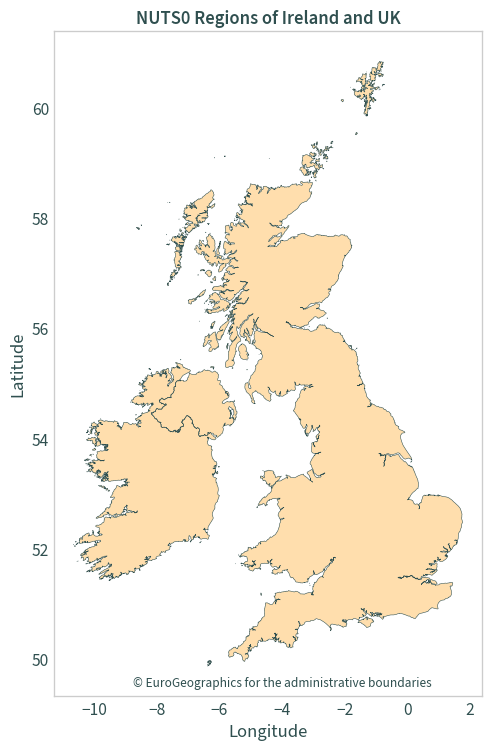

In [13]:
base = nuts0.plot(color="navajowhite", figsize=(9, 9))
nuts0.boundary.plot(ax=base, color="darkslategrey", linewidth=.4)

plt.title("NUTS0 Regions of Ireland and UK")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.text(
    -8.75, 49.5,
    "© EuroGeographics for the administrative boundaries"
)

plt.show()

## NUTS1

In [14]:
DATA_FILE = os.path.join(SUB_DIR, "NUTS_RG_01M_2021_4326_LEVL_1.shp.zip")

In [15]:
nuts1 = gpd.read_file(f"zip://{DATA_FILE}!NUTS_RG_01M_2021_4326_LEVL_1.shp")

In [16]:
nuts1.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,CY0,1,CY,Kýpros,Κύπρος,0,0,0,CY0,"MULTIPOLYGON (((34.60609 35.70767, 34.60060 35..."
1,DEA,1,DE,Nordrhein-Westfalen,Nordrhein-Westfalen,0,0,0,DEA,"POLYGON ((8.70301 52.50044, 8.69906 52.48690, ..."
2,CH0,1,CH,Schweiz/Suisse/Svizzera,Schweiz/Suisse/Svizzera,0,0,0,CH0,"POLYGON ((8.61383 47.80108, 8.62155 47.79372, ..."
3,FRE,1,FR,Hauts-de-France,Hauts-de-France,0,0,0,FRE,"MULTIPOLYGON (((2.60704 50.91269, 2.60665 50.9..."
4,BG3,1,BG,Severna i Yugoiztochna Bulgaria,Северна и Югоизточна България,0,0,0,BG3,"POLYGON ((22.67516 44.21566, 22.69084 44.20456..."


In [17]:
# filter for Ireland and UK
nuts1 = nuts1[nuts1["CNTR_CODE"].isin(["IE", "UK"])]

In [18]:
nuts1

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
67,IE0,1,IE,Ireland,Ireland,0,0,0,IE0,"MULTIPOLYGON (((-6.00177 53.49551, -5.99821 53..."
82,UKN,1,UK,Northern Ireland,Northern Ireland,0,0,0,UKN,"MULTIPOLYGON (((-5.97653 55.05660, -5.96650 55..."
83,UKF,1,UK,East Midlands (England),East Midlands (England),0,0,0,UKF,"POLYGON ((0.01738 53.52537, 0.02249 53.52063, ..."
85,UKG,1,UK,West Midlands (England),West Midlands (England),0,0,0,UKG,"MULTIPOLYGON (((-1.59751 52.70043, -1.59088 52..."
91,UKL,1,UK,Wales,Wales,0,0,0,UKL,"MULTIPOLYGON (((-3.08419 53.25612, -3.08051 53..."
92,UKM,1,UK,Scotland,Scotland,0,0,0,UKM,"MULTIPOLYGON (((-0.73118 60.42356, -0.72621 60..."
94,UKK,1,UK,South West (England),South West (England),0,0,0,UKK,"MULTIPOLYGON (((-1.66573 51.98749, -1.66456 51..."
95,UKE,1,UK,Yorkshire and the Humber,Yorkshire and the Humber,0,0,0,UKE,"MULTIPOLYGON (((0.14090 53.59524, 0.14480 53.5..."
97,UKJ,1,UK,South East (England),South East (England),0,0,0,UKJ,"MULTIPOLYGON (((-0.59177 52.11069, -0.60049 52..."
102,UKH,1,UK,East of England,East of England,0,0,0,UKH,"MULTIPOLYGON (((1.67548 52.74269, 1.68427 52.7..."


In [19]:
# filter for Ireland and Northern Ireland
nuts1 = nuts1[nuts1["NUTS_ID"].isin(["IE0", "UKN"])]

In [20]:
nuts1

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
67,IE0,1,IE,Ireland,Ireland,0,0,0,IE0,"MULTIPOLYGON (((-6.00177 53.49551, -5.99821 53..."
82,UKN,1,UK,Northern Ireland,Northern Ireland,0,0,0,UKN,"MULTIPOLYGON (((-5.97653 55.05660, -5.96650 55..."


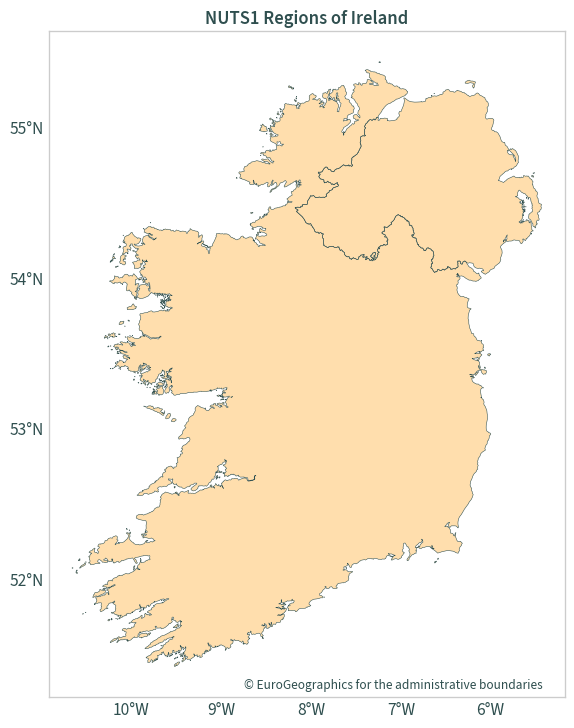

In [21]:
base = nuts1.plot(color="navajowhite", figsize=(9, 9))
nuts1.boundary.plot(ax=base, color="darkslategrey", linewidth=.4)

base.xaxis.set_major_formatter(cplt.longitude_tick_format)
base.yaxis.set_major_formatter(cplt.latitude_tick_format)
base.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.title("NUTS1 Regions of Ireland")
plt.text(
    -8.75, 51.275,
    "© EuroGeographics for the administrative boundaries"
)

plt.show()

In [22]:
nuts1 = nuts1.drop(columns="FID")

In [23]:
nuts1.to_file(GPKG_BOUNDARY, layer="NUTS1")

## NUTS2

In [24]:
DATA_FILE = os.path.join(SUB_DIR, "NUTS_RG_01M_2021_4326_LEVL_2.shp.zip")

In [25]:
nuts2 = gpd.read_file(f"zip://{DATA_FILE}!NUTS_RG_01M_2021_4326_LEVL_2.shp")

In [26]:
nuts2.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,FRB0,2,FR,Centre — Val de Loire,Centre — Val de Loire,0.0,0,0,FRB0,"POLYGON ((1.50153 48.94105, 1.51118 48.93461, ..."
1,CZ04,2,CZ,Severozápad,Severozápad,0.0,0,0,CZ04,"POLYGON ((14.49122 51.04353, 14.49945 51.04610..."
2,CZ07,2,CZ,Střední Morava,Střední Morava,0.0,0,0,CZ07,"POLYGON ((16.90792 50.44945, 16.92475 50.43939..."
3,DK02,2,DK,Sjælland,Sjælland,0.0,0,0,DK02,"MULTIPOLYGON (((12.27222 55.05490, 12.28522 55..."
4,ES12,2,ES,Principado de Asturias,Principado de Asturias,0.0,0,0,ES12,"MULTIPOLYGON (((-4.51230 43.39320, -4.51142 43..."


In [27]:
nuts2 = nuts2[nuts2["NUTS_ID"].str.contains("IE|UKN")]

In [28]:
nuts2

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
185,IE06,2,IE,Eastern and Midland,Eastern and Midland,0.0,0,0,IE06,"MULTIPOLYGON (((-6.00177 53.49551, -5.99821 53..."
252,IE04,2,IE,Northern and Western,Northern and Western,0.0,0,0,IE04,"MULTIPOLYGON (((-7.25607 55.06703, -7.26560 55..."
256,UKN0,2,UK,Northern Ireland,Northern Ireland,0.0,0,0,UKN0,"MULTIPOLYGON (((-5.97653 55.05660, -5.96650 55..."
259,IE05,2,IE,Southern,Southern,0.0,0,0,IE05,"MULTIPOLYGON (((-9.00931 53.14082, -9.02484 53..."


In [29]:
nuts2.total_bounds.round(2)

array([-10.66,  51.42,  -5.43,  55.44])

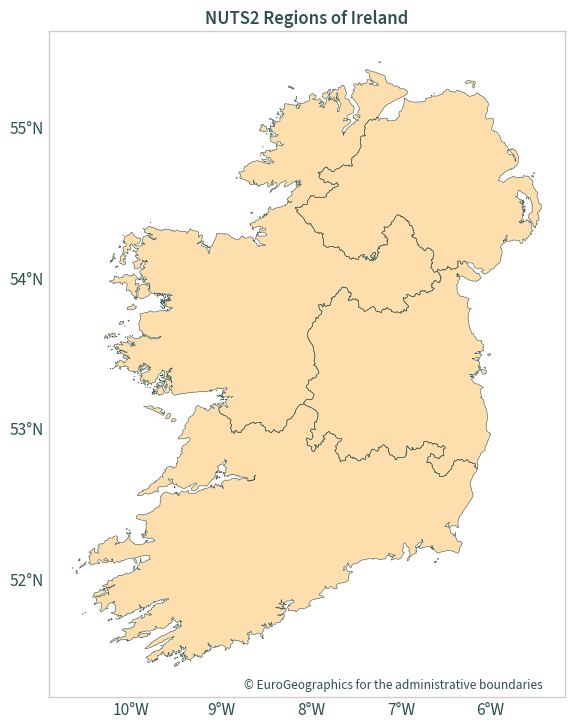

In [30]:
base = nuts2.plot(color="navajowhite", figsize=(9, 9))
nuts2.boundary.plot(ax=base, color="darkslategrey", linewidth=.4)

base.xaxis.set_major_formatter(cplt.longitude_tick_format)
base.yaxis.set_major_formatter(cplt.latitude_tick_format)
base.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.title("NUTS2 Regions of Ireland")
plt.text(
    -8.75, 51.275,
    "© EuroGeographics for the administrative boundaries"
)

plt.show()

In [31]:
nuts2 = nuts2.drop(columns="FID")

In [32]:
nuts2.to_file(GPKG_BOUNDARY, layer="NUTS2")

## NUTS3

In [33]:
DATA_FILE = os.path.join(SUB_DIR, "NUTS_RG_01M_2021_4326_LEVL_3.shp.zip")

In [34]:
nuts3 = gpd.read_file(f"zip://{DATA_FILE}!NUTS_RG_01M_2021_4326_LEVL_3.shp")

In [35]:
nuts3.head()

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,NO0B2,3,NO,Svalbard,Svalbard,3,3,1,NO0B2,"MULTIPOLYGON (((33.09131 80.24908, 33.09929 80..."
1,NO0B1,3,NO,Jan Mayen,Jan Mayen,3,3,1,NO0B1,"POLYGON ((-7.96242 71.16199, -7.95530 71.15968..."
2,HR064,3,HR,Krapinsko-zagorska županija,Krapinsko-zagorska županija,4,3,3,HR064,"POLYGON ((16.25128 46.07165, 16.24254 46.06220..."
3,DE21A,3,DE,Erding,Erding,4,3,3,DE21A,"POLYGON ((12.01712 48.43068, 12.02210 48.42585..."
4,DE94E,3,DE,"Osnabrück, Landkreis","Osnabrück, Landkreis",4,2,3,DE94E,"POLYGON ((8.01815 52.68391, 8.03442 52.67338, ..."


In [36]:
nuts3 = nuts3[nuts3["NUTS_ID"].str.contains("IE|UKN")]

In [37]:
nuts3

,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
900,IE041,3,IE,Border,Border,4,3,1,IE041,"MULTIPOLYGON (((-7.25607 55.06703, -7.26560 55..."
906,IE051,3,IE,Mid-West,Mid-West,4,3,1,IE051,"MULTIPOLYGON (((-9.00931 53.14082, -9.02484 53..."
907,IE063,3,IE,Midland,Midland,4,3,3,IE063,"POLYGON ((-7.34383 53.79906, -7.34168 53.79263..."
1034,IE062,3,IE,Mid-East,Mid-East,4,2,1,IE062,"POLYGON ((-6.26802 54.10234, -6.26085 54.09145..."
1055,IE042,3,IE,West,West,4,3,1,IE042,"MULTIPOLYGON (((-9.13226 54.16236, -9.12055 54..."
1070,IE052,3,IE,South-East,South-East,4,3,1,IE052,"MULTIPOLYGON (((-6.14452 52.73770, -6.14220 52..."
1151,IE053,3,IE,South-West,South-West,4,3,1,IE053,"MULTIPOLYGON (((-9.36519 52.57212, -9.35648 52..."
1152,IE061,3,IE,Dublin,Dublin,4,1,1,IE061,"MULTIPOLYGON (((-6.00177 53.49551, -5.99821 53..."
1266,UKN0B,3,UK,Mid Ulster,Mid Ulster,4,3,2,UKN0B,"POLYGON ((-6.49990 54.91875, -6.49891 54.91682..."
1275,UKN0C,3,UK,Causeway Coast and Glens,Causeway Coast and Glens,4,3,1,UKN0C,"MULTIPOLYGON (((-5.97653 55.05660, -5.97802 55..."


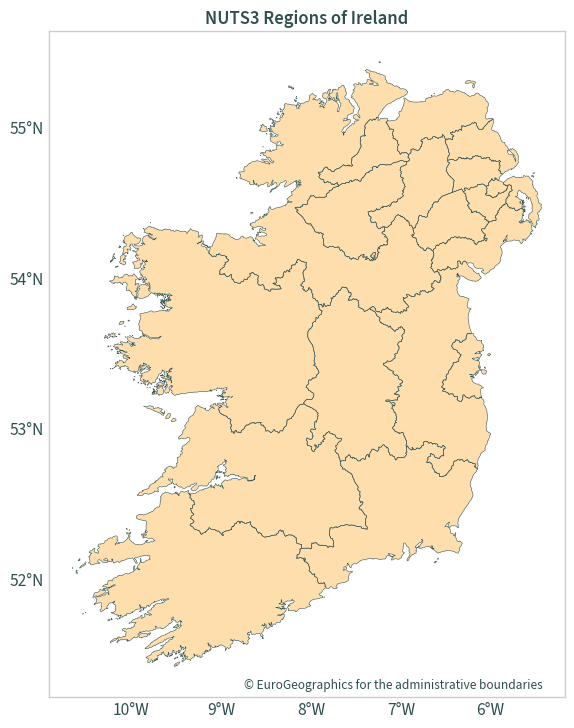

In [38]:
base = nuts3.plot(color="navajowhite", figsize=(9, 9))
nuts3.boundary.plot(ax=base, color="darkslategrey", linewidth=.4)

base.xaxis.set_major_formatter(cplt.longitude_tick_format)
base.yaxis.set_major_formatter(cplt.latitude_tick_format)
base.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.title("NUTS3 Regions of Ireland")
plt.text(
    -8.75, 51.275,
    "© EuroGeographics for the administrative boundaries"
)

plt.show()

In [39]:
nuts3 = nuts3.drop(columns="FID")

In [40]:
nuts3.to_file(GPKG_BOUNDARY, layer="NUTS3")

## Island of Ireland boundary

In [41]:
ie = nuts1.copy()

In [42]:
ie = ie.dissolve(by="LEVL_CODE", as_index=False)

In [43]:
ie

,LEVL_CODE,geometry,NUTS_ID,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE
0,1,"MULTIPOLYGON (((-10.18425 51.60914, -10.17367 ...",IE0,IE,Ireland,Ireland,0,0,0


In [44]:
ie = ie[["geometry"]]

In [45]:
ie = ie.assign(NAME="Ireland")

In [46]:
description = (
    "Boundary for the Island of Ireland generated using NUTS1 boundaries"
)

ie = ie.assign(DESCRIPTION=description)

In [47]:
ie

,geometry,NAME,DESCRIPTION
0,"MULTIPOLYGON (((-10.18425 51.60914, -10.17367 ...",Ireland,Boundary for the Island of Ireland generated u...


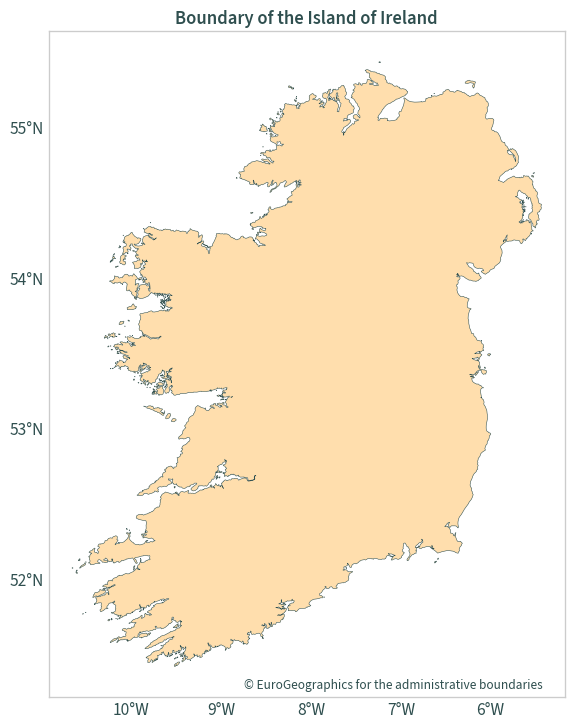

In [48]:
base = ie.plot(color="navajowhite", figsize=(9, 9))
ie.boundary.plot(ax=base, color="darkslategrey", linewidth=.4)

base.xaxis.set_major_formatter(cplt.longitude_tick_format)
base.yaxis.set_major_formatter(cplt.latitude_tick_format)
base.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.title("Boundary of the Island of Ireland")
plt.text(
    -8.75, 51.275,
    "© EuroGeographics for the administrative boundaries"
)

plt.show()

In [49]:
ie.to_file(GPKG_BOUNDARY, layer="NUTS_Ireland")

## Island of Ireland in Irish transverse mercator

Useful for plotting

EPSG:2157

See <https://www.gov.uk/government/publications/uk-geospatial-data-standards-register/national-geospatial-data-standards-register#standards-for-coordinate-reference-systems>

In [50]:
ie.to_crs(2157, inplace=True)

In [51]:
ie

,geometry,NAME,DESCRIPTION
0,"MULTIPOLYGON (((448722.913 541888.069, 449455....",Ireland,Boundary for the Island of Ireland generated u...


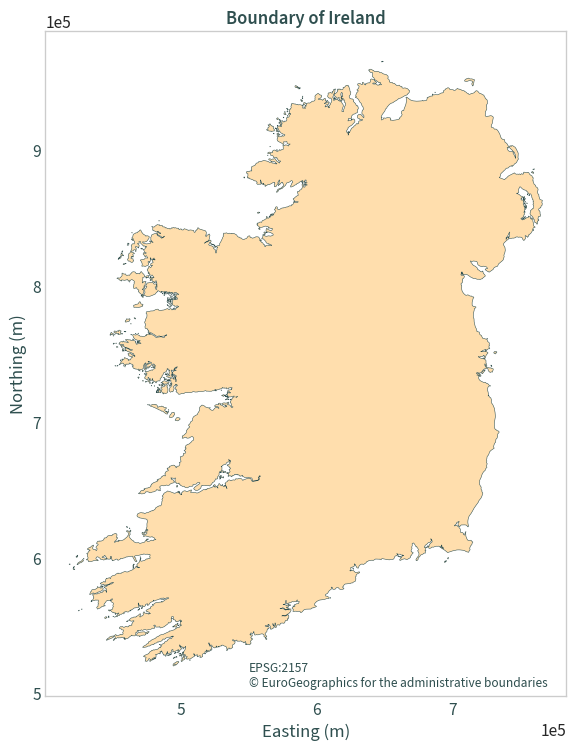

In [52]:
base = ie.plot(color="navajowhite", figsize=(9, 9))
ie.boundary.plot(ax=base, color="darkslategrey", linewidth=.4)

plt.ticklabel_format(style="scientific", scilimits=[-4, 4])
base.xaxis.set_major_locator(ticker.MultipleLocator(1e5))

plt.title("Boundary of Ireland")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.text(
    550000, 505000,
    "EPSG:2157\n© EuroGeographics for the administrative boundaries"
)

plt.show()

In [54]:
ie.to_file(GPKG_BOUNDARY, layer="NUTS_Ireland_ITM")